In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/project/50000.csv',encoding='ISO-8859-1')
# data['tags'] = data['tags'].apply(literal_eval)
# x = data.nutrition
x = data.drop(["name","id","contributor_id","submitted","steps","tags","description","ingredients"],axis = 1)
y = data['vegetarian']


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert each category in the label to an integer
# le = LabelEncoder()
# y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=0)

In [ ]:
print(y)
print(y.shape)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: vegetarian, Length: 50000, dtype: int64
(50000,)


In [ ]:
print(y_train)

20330    0
17532    1
45819    0
34807    0
31888    0
        ..
21243    1
45891    0
42613    1
43567    0
2732     0
Name: vegetarian, Length: 40000, dtype: int64


In [ ]:
print(X_train)

       minutes  healthy  ...  stated_fat  total_carbonhydrate
20330       70        0  ...          29                    6
17532       60        1  ...           6                   13
45819       50        0  ...           0                    5
34807      130        1  ...           0                    5
31888       25        0  ...          12                    3
...        ...      ...  ...         ...                  ...
21243       10        1  ...          29                    9
45891       10        0  ...           0                    1
42613       20        0  ...           0                    0
43567        1        0  ...           0                    1
2732        20        0  ...          58                   18

[40000 rows x 19 columns]


 **K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21): # Declare an of the KNN classifier class with the value with neighbors.

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train) # Fit the model with training data and target values
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 83.34 % and k = [16]


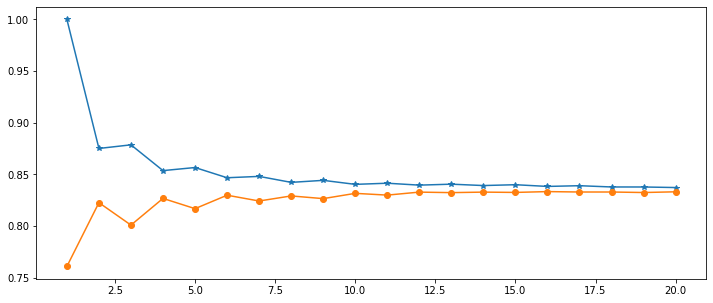

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(range(1,21),train_scores,marker='*',label='Train Score')
plt.plot(range(1,21),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(16)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8334

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,8305,32,8337
1,1634,29,1663
All,9939,61,10000


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      8337
           1       0.48      0.02      0.03      1663

    accuracy                           0.83     10000
   macro avg       0.66      0.51      0.47     10000
weighted avg       0.78      0.83      0.76     10000



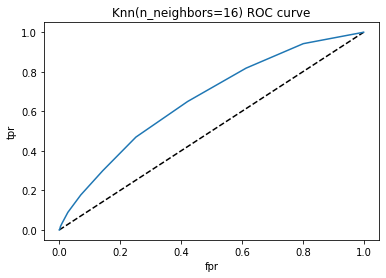

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=16) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6602175379573817

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.835475
Best Parameters: {'n_neighbors': 22}


**NAIVE** **BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [ ]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [ ]:
mod.score(X_test,y_test)

0.9973

In [ ]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[8337    0]
 [  27 1636]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8337
           1       1.00      0.98      0.99      1663

    accuracy                           1.00     10000
   macro avg       1.00      0.99      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**NN**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.42475303
Iteration 2, loss = 0.16340647
Iteration 3, loss = 0.11374543
Iteration 4, loss = 0.07731756
Iteration 5, loss = 0.02774032
Iteration 6, loss = 0.00836943
Iteration 7, loss = 0.00353455
Iteration 8, loss = 0.00188844
Iteration 9, loss = 0.00116315
Iteration 10, loss = 0.00078507
Iteration 11, loss = 0.00056387
Iteration 12, loss = 0.00042233
Iteration 13, loss = 0.00032738
Iteration 14, loss = 0.00025995
Iteration 15, loss = 0.00020794
Iteration 16, loss = 0.00016783
Iteration 17, loss = 0.00013854
Iteration 18, loss = 0.00011639
Iteration 19, loss = 0.00009905
Iteration 20, loss = 0.00008509
Iteration 21, loss = 0.00007363
Iteration 22, loss = 0.00006443
Iteration 23, loss = 0.00005681
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
predictions = mlp.predict(X_test)

from sklearn import metrics 
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 1.0
[[8337    0]
 [   0 1663]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8337
           1       1.00      1.00      1.00      1663

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

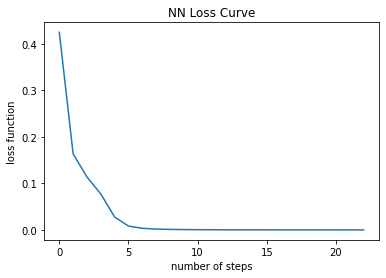

In [ ]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [ ]:
(mlp.intercepts_[0]).shape

(10,)

In [ ]:
(mlp.coefs_[0]).shape

(19, 10)

In [ ]:
mlp.intercepts_[0]

array([-0.17131568,  0.61678711,  0.44073108,  0.93235878,  0.78211868,
        0.01629371,  0.19233758,  0.15961138,  1.30358795,  0.17405397])

In [ ]:
mlp.coefs_[0]

array([[ 0.14813451,  0.10104566,  0.19360567, -0.76532559,  0.09753541,
        -0.25437324,  0.05520113, -0.21412182,  0.04804222, -0.04377433],
       [ 0.08823844,  0.01073291, -0.01522783,  0.23207616,  0.39348826,
         0.47578814, -0.26091929, -0.5928684 ,  0.19979738, -0.09888366],
       [-0.03438435,  0.17292192, -0.31014354, -0.10300359,  0.07452795,
         0.31352263, -0.08466968, -0.20496969,  0.20682107, -0.05768936],
       [-0.02926709, -0.12988943, -0.37197604,  0.55890643,  0.17167707,
         0.21677092, -0.41343707, -0.42991106, -0.11204919, -0.6461775 ],
       [ 0.18427688,  0.27453171,  0.12737853,  0.20233242, -0.32403315,
        -0.0635766 ,  0.21106218,  0.14689976,  0.05992744, -0.31353547],
       [-0.18996142, -0.05361798,  0.22697266,  0.19701722, -0.27539786,
         0.04219996, -0.68927779, -0.24169174, -0.28197356, -0.38244175],
       [-0.11016797,  0.43947802,  0.19963333,  0.58578758, -0.42057142,
        -0.05305433,  0.06855985, -0.73405519

In [ ]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 0.89634920
Iteration 2, loss = 0.45086899
Iteration 3, loss = 0.16085382
Iteration 4, loss = 0.05255628
Iteration 5, loss = 0.02467824
Iteration 6, loss = 0.01349090
Iteration 7, loss = 0.00812544
Iteration 8, loss = 0.00522949
Iteration 9, loss = 0.00353246
Iteration 10, loss = 0.00248803
Iteration 11, loss = 0.00182404
Iteration 12, loss = 0.00137581
Iteration 13, loss = 0.00106390
Iteration 14, loss = 0.00084053
Iteration 15, loss = 0.00067574
Iteration 16, loss = 0.00055068
Iteration 17, loss = 0.00045418
Iteration 18, loss = 0.00037840
Iteration 19, loss = 0.00031807
Iteration 20, loss = 0.00026945
Iteration 21, loss = 0.00022979
Iteration 22, loss = 0.00019717
Iteration 23, loss = 0.00017008
Iteration 24, loss = 0.00014743
Iteration 25, loss = 0.00012837
Iteration 26, loss = 0.00011226
Iteration 27, loss = 0.00009855
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

Accuracy 1.0
[[8337    0]
 [   0 1663]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8337
           1       1.00      1.00      1.00      1663

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [ ]:
logreg.intercept_.T

array([-4.0190394])

In [ ]:
logreg.coef_.T

array([[-1.00359667e-02],
       [ 2.78624309e-02],
       [ 9.48859861e-02],
       [ 4.74836919e-02],
       [ 1.81798499e-02],
       [-1.64959059e-02],
       [ 3.68142806e-03],
       [ 4.49251327e-02],
       [-3.15688060e-02],
       [ 3.47888806e+00],
       [-5.90152467e-03],
       [-7.64742174e-03],
       [-9.03388260e-03],
       [-9.07224380e-04],
       [-7.61429436e-03],
       [-9.32446604e-03],
       [-1.35894735e-01],
       [-4.54003343e-02],
       [ 3.11854288e-03]])

In [ ]:
print(y_test)

11841    1
19602    1
45519    0
25747    0
42642    0
        ..
25091    0
27853    0
47278    0
37020    1
2217     0
Name: vegetarian, Length: 10000, dtype: int64


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
##before processing data in PCA, we got 0.73 accurancy, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

[[8337    0]
 [   0 1663]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8337
           1       1.00      1.00      1.00      1663

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

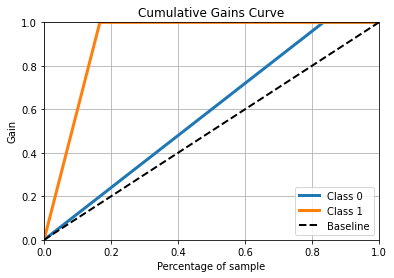

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

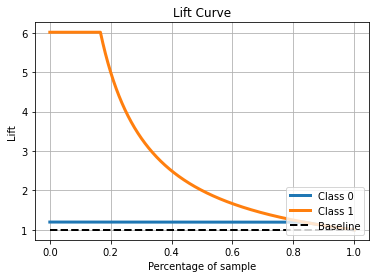

In [ ]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()